<a href="https://colab.research.google.com/github/zaenalSamsul/Pengolahan-Citra-adaption-Jurnal/blob/main/Deteksi_Embrio_Telur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silakan upload file gambar.


Saving embrio ayam.jpeg to embrio ayam.jpeg
Memproses file: embrio ayam.jpeg


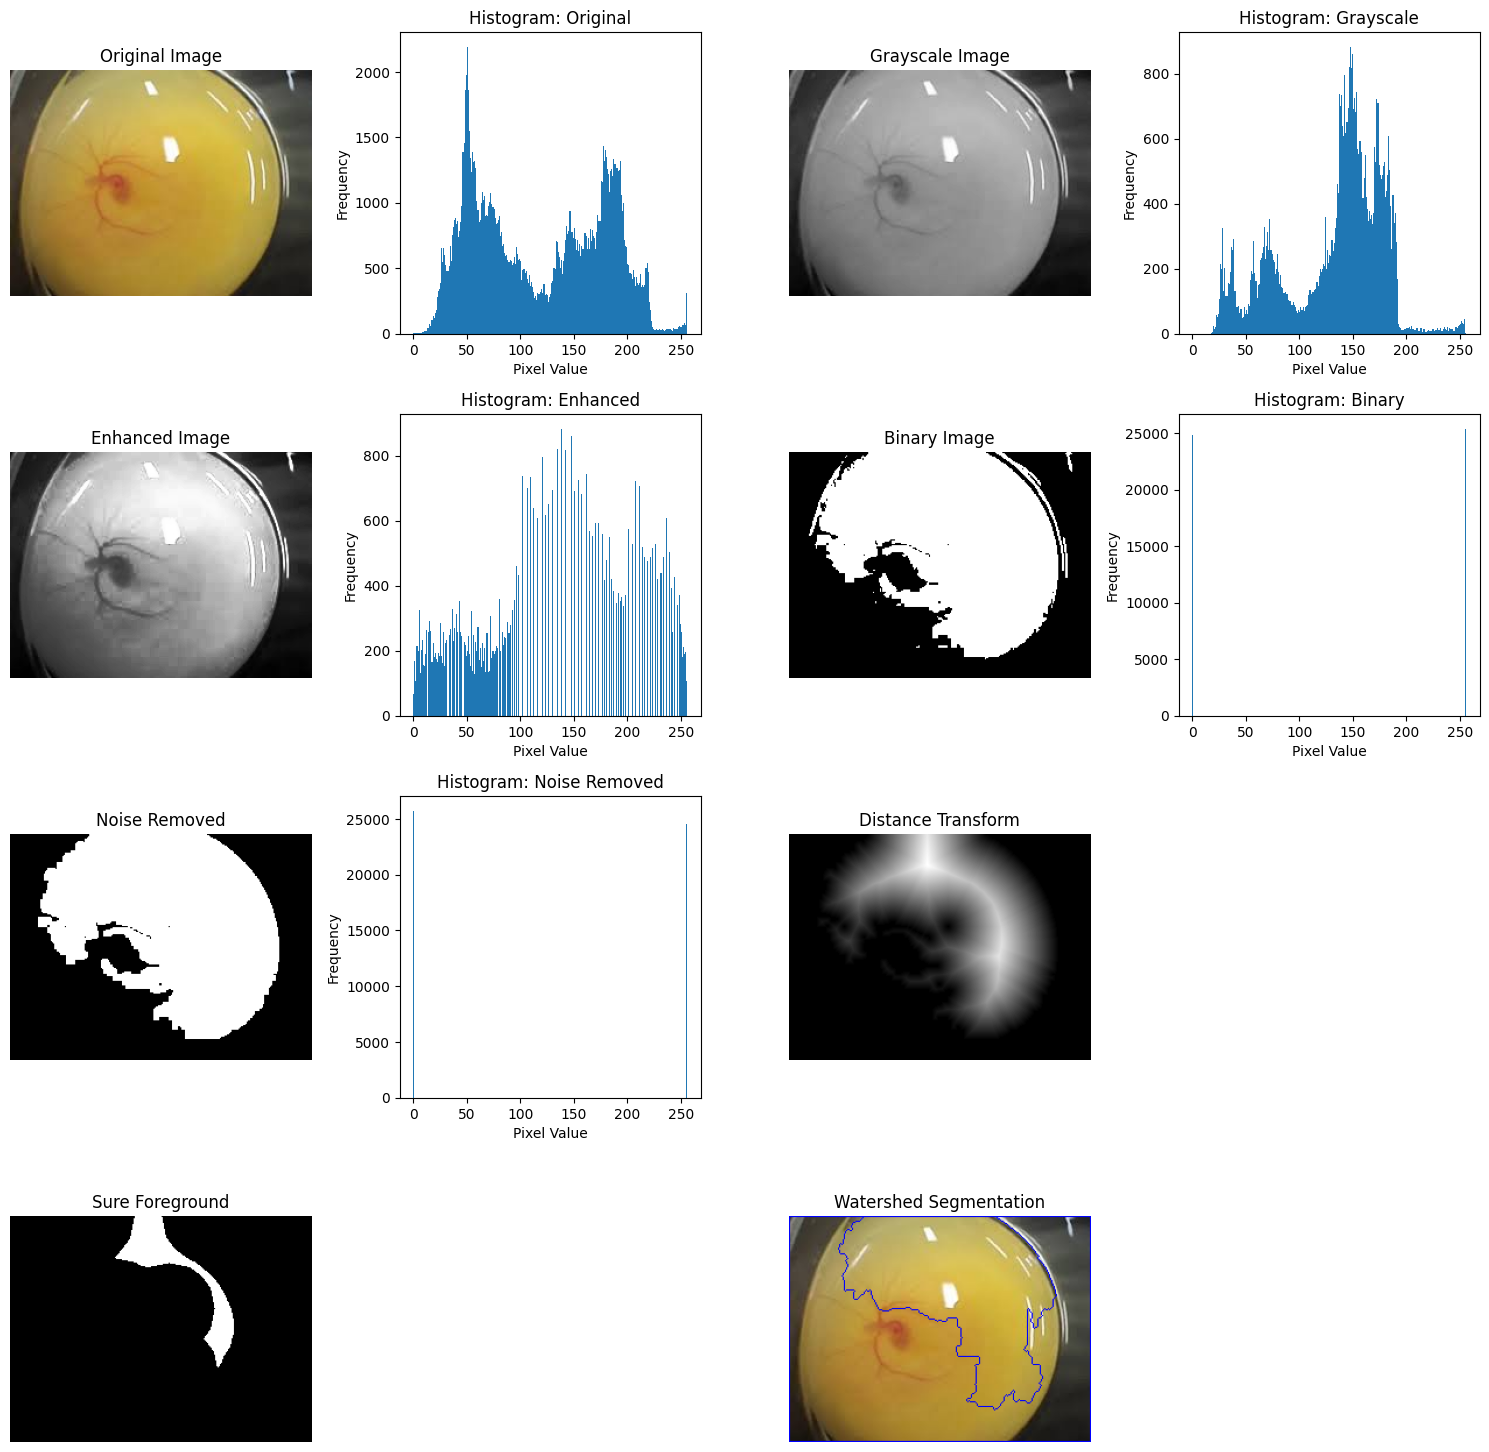

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Pastikan grafik langsung ditampilkan di notebook
%matplotlib inline

def plot_histogram(image, title, position):
    plt.subplot(4, 4, position)
    plt.title(title)
    plt.hist(image.ravel(), 256, [0, 256])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

def detect_embryo(image_path):
    # Step 1: Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to read image. Please check the file path.")
        return

    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Enhance the image (e.g., Histogram Equalization)
    enhanced = cv2.equalizeHist(gray)

    # Step 3: Thresholding to separate the embryo region
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Step 4: Noise removal using morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Step 5: Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Step 6: Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Step 7: Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Step 8: Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0 but 1
    markers = markers + 1

    # Mark the unknown region with zero
    markers[unknown == 255] = 0

    # Step 9: Apply Watershed algorithm
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]  # Mark boundaries in red

    # Step 10: Visualize results and histograms
    plt.figure(figsize=(15, 15))

    # Original Image
    plt.subplot(4, 4, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    # Histogram of Original Image
    plot_histogram(original, "Histogram: Original", 2)

    # Grayscale Image
    plt.subplot(4, 4, 3)
    plt.title("Grayscale Image")
    plt.imshow(gray, cmap='gray')
    plt.axis("off")

    # Histogram of Grayscale Image
    plot_histogram(gray, "Histogram: Grayscale", 4)

    # Enhanced Image
    plt.subplot(4, 4, 5)
    plt.title("Enhanced Image")
    plt.imshow(enhanced, cmap='gray')
    plt.axis("off")

    # Histogram of Enhanced Image
    plot_histogram(enhanced, "Histogram: Enhanced", 6)

    # Binary Image
    plt.subplot(4, 4, 7)
    plt.title("Binary Image")
    plt.imshow(binary, cmap='gray')
    plt.axis("off")

    # Histogram of Binary Image
    plot_histogram(binary, "Histogram: Binary", 8)

    # Noise Removed Image
    plt.subplot(4, 4, 9)
    plt.title("Noise Removed")
    plt.imshow(opening, cmap='gray')
    plt.axis("off")

    # Histogram of Noise Removed Image
    plot_histogram(opening, "Histogram: Noise Removed", 10)

    # Distance Transform
    plt.subplot(4, 4, 11)
    plt.title("Distance Transform")
    plt.imshow(dist_transform, cmap='gray')
    plt.axis("off")

    # Sure Foreground
    plt.subplot(4, 4, 13)
    plt.title("Sure Foreground")
    plt.imshow(sure_fg, cmap='gray')
    plt.axis("off")

    # Watershed Segmentation
    plt.subplot(4, 4, 15)
    plt.title("Watershed Segmentation")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()  # Menampilkan hasil langsung di layar

# Main Program to Input Image Path
if __name__ == "__main__":
    print("Silakan upload file gambar.")
    uploaded = files.upload()
    if uploaded:
        # Proses hanya file pertama
        file_name = list(uploaded.keys())[0]
        print(f"Memproses file: {file_name}")
        detect_embryo(file_name)
    else:
        print("Tidak ada file yang diunggah.")


# Program Deteksi Embrio Menggunakan Watershed Algorithm

## Deskripsi
Program ini bertujuan untuk mendeteksi dan memvisualisasikan area embrio dalam sebuah gambar menggunakan teknik **image processing** dengan pendekatan algoritma Watershed. Proses terdiri dari langkah-langkah pre-processing, segmentasi, dan visualisasi hasil dengan histogram.

---

## Langkah-Langkah Proses

### 1. Membaca Gambar
- **Deskripsi:**
  Gambar dibaca menggunakan OpenCV (`cv2.imread()`), lalu diubah ke skala abu-abu dengan `cv2.cvtColor`.
- **Tujuan:**
  Konversi ke grayscale mempermudah operasi pada tahap berikutnya.

---

### 2. Peningkatan Gambar
- **Deskripsi:**
  Melakukan **Histogram Equalization** pada gambar grayscale menggunakan `cv2.equalizeHist()` untuk meningkatkan kontras.
- **Tujuan:**
  Menonjolkan area yang memiliki intensitas piksel rendah atau tinggi.

---

### 3. Thresholding
- **Deskripsi:**
  Menggunakan metode **Otsu's Thresholding** untuk mengubah gambar ke bentuk biner.
- **Langkah:**
  Mengaplikasikan `cv2.threshold()` dengan mode `THRESH_BINARY + THRESH_OTSU`.
- **Tujuan:**
  Memisahkan objek (embrio) dari latar belakang.

---

### 4. Penghapusan Noise
- **Deskripsi:**
  Menggunakan operasi morfologi **Opening** dengan kernel 3x3.
- **Langkah:**
  Aplikasi `cv2.morphologyEx()` dengan parameter `MORPH_OPEN`.
- **Tujuan:**
  Menghilangkan noise kecil pada hasil thresholding.

---

### 5. Penentuan Area
- **Deskripsi:**
  Menentukan area foreground (embrio) dan background (latar belakang).
- **Langkah:**
  - **Sure Background:** Menggunakan dilasi pada hasil morfologi opening.
  - **Sure Foreground:** Menggunakan **distance transform** dan threshold.
  - **Unknown Region:** Dihitung dengan mengurangkan sure background dari sure foreground.
- **Tujuan:**
  Memisahkan dengan jelas area embrio dari latar belakang.

---

### 6. Marker Labelling
- **Deskripsi:**
  Menandai setiap area tersegmentasi menggunakan `cv2.connectedComponents()`. Menambahkan satu ke semua label untuk memastikan latar belakang memiliki nilai `1`.
- **Tujuan:**
  Persiapan untuk proses algoritma Watershed.

---

### 7. Segmentasi dengan Watershed
- **Deskripsi:**
  Menerapkan algoritma Watershed untuk memperbaiki segmentasi dan menandai batas area embrio.
- **Langkah:**
  - Menandai batas area sebagai `-1`.
  - Menampilkan batas tersebut dengan warna merah pada gambar asli.
- **Tujuan:**
  Mengidentifikasi batas yang lebih akurat antara embrio dan latar belakang.

---

### 8. Visualisasi Hasil
- **Deskripsi:**
  Menampilkan hasil setiap langkah dalam bentuk gambar dan histogram:
  - **Gambar asli** dan histogramnya.
  - **Grayscale image** dan histogramnya.
  - **Enhanced image** dan histogramnya.
  - **Binary image** dan histogramnya.
  - **Noise removed image** dan histogramnya.
  - **Distance transform**.
  - **Sure foreground**.
  - **Hasil Watershed segmentation**.
- **Tujuan:**
  Memahami perubahan yang terjadi pada setiap tahap pemrosesan.

---

## Penjelasan Output

### 1. Original Image
- **Deskripsi:**
  Gambar asli yang diinputkan ke sistem.

### 2. Grayscale Image
- **Deskripsi:**
  Gambar asli yang telah diubah menjadi grayscale.

### 3. Enhanced Image
- **Deskripsi:**
  Gambar grayscale yang telah ditingkatkan kontrasnya melalui histogram equalization.

### 4. Binary Image
- **Deskripsi:**
  Hasil thresholding untuk memisahkan embrio dari latar belakang.


### 5. Noise Removed (Hasil Setelah Penghapusan Noise)
- Tahap ini menggunakan operasi morfologi seperti **opening** untuk menghilangkan noise kecil pada gambar hasil thresholding.
- **Interpretasi**:
  - Area putih pada gambar menunjukkan objek utama (kemungkinan embrio).
  - Area hitam merupakan latar belakang.
- Noise kecil berhasil dihilangkan, sehingga objek utama menjadi lebih jelas.

---

### 6. Histogram: Noise Removed
- Histogram ini menunjukkan distribusi nilai piksel setelah penghapusan noise.
- **Interpretasi**:
  - Sebagian besar piksel memiliki nilai di ujung atas (warna putih) dan bawah (warna hitam).
  - Hal ini konsisten dengan hasil biner dari proses thresholding.

---

### 7. Distance Transform
- **Distance transform** digunakan untuk menghitung jarak tiap piksel latar depan (foreground) ke piksel latar belakang (background) terdekat.
- **Interpretasi**:
  - Area yang lebih terang menandakan jarak terbesar dari piksel foreground ke tepi.
  - Tahap ini membantu dalam menentukan **sure foreground** (area foreground yang pasti).

---

### 8. Sure Foreground
- Gambar ini menunjukkan area **foreground yang pasti** yang dihasilkan dari thresholding pada hasil distance transform.
- **Interpretasi**:
  - Area putih adalah bagian yang dianggap sebagai bagian objek utama yang paling jelas (yaitu embrio).
  - Area ini akan digunakan sebagai input untuk segmentasi.

---

### 9. Watershed Segmentation
- Hasil akhir dari segmentasi menggunakan algoritma watershed.
- **Interpretasi**:
  - Batas antara objek (dan antara objek dengan latar belakang) ditandai dengan garis merah.
  - Objek utama (embrio) berhasil dipisahkan dari latar belakang dengan lebih jelas.

---

## Kesimpulan
- Proses deteksi melalui langkah-langkah seperti penghapusan noise, transformasi jarak, dan algoritma watershed telah berhasil memisahkan embrio dari latar belakang.
- **Saran untuk Analisis**:
  - Pastikan hasil segmentasi sesuai dengan bentuk dan lokasi embrio yang sebenarnya.
  - Jika terdapat noise atau batas tidak sempurna, tambahkan langkah-langkah perbaikan seperti fine-tuning parameter threshold atau kernel morfologi.
  - Gunakan gambar dengan kualitas tinggi untuk meningkatkan akurasi hasil deteksi.

## Persyaratan
- **Pustaka Python:**
  - `cv2` (OpenCV)
  - `NumPy`
  - `Matplotlib`
  - `google.colab` (untuk mengunggah file di Google Colab)

---

## Cara Menggunakan
1. Unggah file gambar yang ingin diproses.
2. Jalankan fungsi `detect_embryo(image_path)` dengan jalur file gambar sebagai parameter.
3. Amati hasil visualisasi pada layar.

---

## Catatan
- Pastikan gambar memiliki resolusi yang cukup untuk mendeteksi detail embrio.
- Ubah nilai kernel atau parameter lainnya jika diperlukan untuk hasil segmentasi yang lebih optimal.
